In [1]:
%load_ext autoreload
%autoreload 2.0
%matplotlib inline

In [2]:
# %reload_ext autoreload

In [3]:
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

/home/injy/mariam_workspace/env/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/injy/mariam_workspace/env/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/injy/mariam_workspace/env/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/injy/mariam_workspace/env/lib/python3.5/site-pack

In [4]:
import sys
sys.path.insert(0, '../.')

In [5]:
from data.segmentation_dataset_loader import *
from data.detection_dataset_loader import *
from model import *
from Trainer import *
from evaluation.evaluate import *

In [6]:
import numpy as np
from PIL import Image, ImageDraw
import math
import numpy.matlib as npm
from scipy import ndimage, misc

In [7]:
from skimage.transform import rescale

In [8]:
from data.data_utils.reader import *

In [9]:
from scipy.ndimage import rotate

In [10]:
def convert5Pointto8Point(cx_, cy_, w_, h_, a_):

    theta = math.radians(a_)
    bbox = npm.repmat([[cx_], [cy_]], 1, 5) + \
       np.matmul([[math.cos(theta), math.sin(theta)],
                  [-math.sin(theta), math.cos(theta)]],
                 [[-w_ / 2, w_/ 2, w_ / 2, -w_ / 2, w_ / 2 + 8],
                  [-h_ / 2, -h_ / 2, h_ / 2, h_ / 2, 0]])
    # add first point
    x1, y1 = bbox[0][0], bbox[1][0]
    # add second point
    x2, y2 = bbox[0][1], bbox[1][1]
    # add third point
    #x3, y3 = bbox[0][4], bbox[1][4]   
    # add forth point
    x3, y3 = bbox[0][2], bbox[1][2]
    # add fifth point
    x4, y4 = bbox[0][3], bbox[1][3]

    return [x1, y1, x2, y2, x3, y3, x4, y4]

In [11]:
import math

def rotate2(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [12]:
base_path = '../../../Data'

In [13]:
list_files = list(map(lambda x: x.split('.')[0], os.listdir(base_path+'/data_object_image_3/training/image_3')))
random.seed(0)
random.shuffle(list_files)
ln = int(len(list_files) * 0.8)
list_files= list_files[ln:]

In [14]:
i = 10
current_file = list_files[i]
current_file

'002705'

In [15]:
dataset = DetectionDatasetLoader(base_path='../../../Data', batch_size=4, random_seed=0, training=True)
temp = dataset.get_next(batch_size=4)

In [16]:
temp = dataset.get_next(batch_size=4)

In [17]:
for i in range(4):
    print(np.min(temp[1][i, :, :, :]), np.max(temp[1][i, :, :, :]))

0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0


<Figure size 432x288 with 0 Axes>

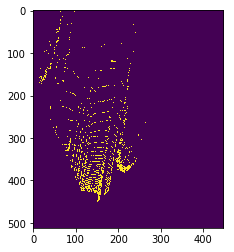

In [18]:
plt.clf()
fig,ax = plt.subplots(1)

img = np.clip(np.mean(temp[1][0, :, :, :]*255., 2), 0, 1)
ax.imshow(img)

        
plt.show()

<Figure size 432x288 with 0 Axes>

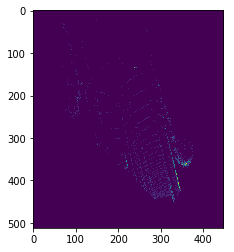

In [19]:
plt.clf()
fig,ax = plt.subplots(1)

img = np.clip(np.mean(temp[1][1, :, :, :], 2), 0, 1)
ax.imshow(img)

        
plt.show()

<Figure size 432x288 with 0 Axes>

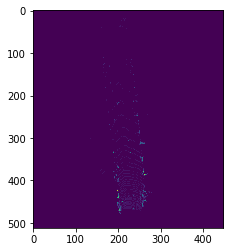

In [20]:
plt.clf()
fig,ax = plt.subplots(1)

img = np.clip(np.mean(temp[1][2, :, :, :], 2), 0, 1)
ax.imshow(img)

        
plt.show()

<Figure size 432x288 with 0 Axes>

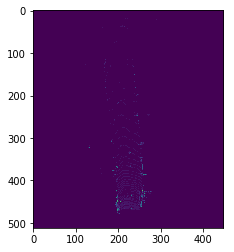

In [21]:
plt.clf()
fig,ax = plt.subplots(1)

img = np.clip(np.mean(temp[1][3, :, :, :], 2), 0, 1)
ax.imshow(img)

        
plt.show()

In [21]:
# !cat ../../../Data/data_object_calib/training/calib/002705.txt

In [22]:
!cat ../../../Data/data_object_label_2/training/label_2/002705.txt

Car 0.52 0 -2.53 0.00 205.84 187.52 316.87 1.41 1.59 3.94 -8.60 1.94 10.40 3.07
Car 0.02 3 -2.56 0.00 181.94 258.18 286.02 1.69 1.77 3.51 -8.50 1.87 12.85 -3.13
Car 0.00 2 -2.68 117.51 188.64 336.12 269.90 1.61 1.66 3.86 -8.25 1.98 15.70 3.12
Car 0.00 1 2.97 233.23 182.92 392.19 246.52 1.59 1.71 3.90 -8.38 1.90 20.32 2.58
Car 0.00 2 2.98 354.03 185.62 425.11 224.79 1.43 1.57 2.43 -8.66 1.95 28.21 2.68
Car 0.00 2 3.04 374.45 183.46 469.09 220.57 1.48 1.74 3.77 -8.14 1.96 31.03 2.79
Car 0.00 0 1.76 474.32 182.54 510.23 210.05 1.55 1.54 3.06 -6.98 2.14 42.86 1.60
DontCare -1 -1 -10 512.15 178.59 545.43 201.52 -1 -1 -1 -1000 -1000 -1000 -10
DontCare -1 -1 -10 609.18 176.00 633.41 188.58 -1 -1 -1 -1000 -1000 -1000 -10
DontCare -1 -1 -10 652.52 173.42 692.27 195.71 -1 -1 -1 -1000 -1000 -1000 -10
DontCare -1 -1 -10 795.48 150.13 1240.00 188.59 -1 -1 -1 -1000 -1000 -1000 -10


In [476]:
def read_label(label_path, calib_path, shift_h, shift_w, x_range=(0, 71), y_range=(-40, 40), z_range=(-3.0, 1), 
                    size=(512, 448, 32), get_actual_dims=False, from_file=True, translate_x=0, translate_y=0,
                   translate_z=0, ang=0, get_neg=False):

    if from_file:
        lines = []
        with open(label_path) as label_file:
            lines = label_file.readlines()
    else:
        lines = label_path.split('\n')
    # filter car class
    lines = list(map(lambda x: x.split(), lines))
    if len(lines) > 0:
        if get_neg:
            lines = list(filter(lambda x: len(x) > 0 and ( x[0] not in ['Car', 'Van', 'Truck', 'Tram', 'DontCare']), lines))
            if len(lines) > 0:
                lines = lines[:1]
        else:
            lines = list(filter(lambda x: len(x) > 0 and ( x[0] in ['Car', 'Van', 'Truck', 'Tram']), lines))
    
    def get_parameter(index):
        return list(map(lambda x: x[index], lines))
    
    classes = np.array(get_parameter(0))
    dimension_height = np.array(get_parameter(8)).astype(float)
    dimension_width = np.array(get_parameter(9)).astype(float)
    dimension_length = np.array(get_parameter(10)).astype(float)
    # TODO: take shift into consideration - URGENT
    location_x = np.array(get_parameter(11)).astype(float)
    location_y = np.array(get_parameter(12)).astype(float)
    location_z = np.array(get_parameter(13)).astype(float)
    angles = np.array(get_parameter(14)).astype(float)
    
    # print(len(classes))
    calib_data = read_calib(calib_path)

    locations = np.array([[location_x[i], location_y[i], location_z[i]] for i in range(len(classes))])
    # print(locations)
    if len(locations) > 0 and len(locations[0]) > 0:
        locations = project_rect_to_velo(locations, calib_data['R0_rect'].reshape((3, 3)), calib_data['Tr_velo_to_cam'].reshape((3, 4)))
    # print(locations)
    # print(z_range)
    locations = np.array(list(filter(lambda point: (point[0] >= x_range[0]  and point[0] <= x_range[1])
                                    and (point[1] >= y_range[0] and point[1] <= y_range[1])
                                    and (point[2] >= z_range[0] and point[2] <= z_range[1]) , locations)))

    indx = []
    i = 0
    for point in locations:
        if (point[0] >= x_range[0]  and point[0] <= x_range[1])\
            and (point[1] >= y_range[0] and point[1] <= y_range[1])\
            and (point[2] >= z_range[0] and point[2] <= z_range[1]):
            indx.append(i)
        i += 1

    if len(indx) > 0:
        dimension_height = dimension_height[indx]
        dimension_width = dimension_width[indx]
        dimension_length = dimension_length[indx]
        location_x = location_x[indx]
        location_y = location_y[indx]
        location_z = location_z[indx]
        angles = angles[indx]
        classes = classes[indx]

    if len(locations) > 0:
        locations[:, :3] = locations[:, :3] - np.array([translate_x, translate_y, -translate_z])

    # print('.......')
    # print(len(locations))

    points = [project_point_from_camera_coor_to_velo_coor([location_x[i], location_y[i], location_z[i]], 
                                                        [dimension_height[i], dimension_width[i], dimension_length[i]],
                                                        angles[i],
                                                         calib_data)
                for i in range(len(locations))]
    
    x_size = (x_range[1] - x_range[0])
    y_size = (y_range[1] - y_range[0])
    z_size = (z_range[1] - z_range[0])
            
    x_fac = (size[0]-1) / x_size
    y_fac = (size[1]-1) / y_size
    z_fac = (size[2]-1) / z_size
    if get_actual_dims:
        import math64
        for i in range(len(points)):
            b = points[i]
            x0 = b[0][0]
            y0 = b[0][1]
            x1 = b[1][0]
            y1 = b[1][1]
            x2 = b[2][0]
            y2 = b[2][1]
            u0 = -(x0) * x_fac + size[0]
            v0 = -(y0 + 40) * y_fac + size[1]
            u1 = -(x1) * x_fac + size[0]
            v1 = -(y1 + 40) * y_fac + size[1]
            u2 = -(x2) * x_fac + size[0]
            v2 = -(y2 + 40) * y_fac + size[1]
            dimension_length[i] = math.sqrt((v1-v2)**2 + (u1-u2)**2)
            dimension_width[i] = math.sqrt((v1-v0)**2 + (u1-u0)**2)
            dimension_height[i] = math.sqrt((-(b[0][2]+(-1*z_range[1]))*z_fac+(-b[4][2]+z_range[1])*z_fac)**2)

      

    x_range = (x_range[0] + translate_x, x_range[1] + translate_x)
    y_range = (y_range[0] + translate_y, y_range[1] + translate_y)
    z_range = (z_range[0] + translate_z, z_range[1] + translate_z)
    
#     if translate_x <= 0:
    output = [[-(locations[i][0] + -1*x_range[0]) * x_fac + size[0], -(locations[i][1] + -1*y_range[0]) * y_fac + size[1], -(locations[i][2] + -1*z_range[0]) * z_fac + size[2], 
                    dimension_height[i], dimension_width[i], dimension_length[i], angles[i]] 
                    for i in range(len(locations))]
#     else:
#         output = [[-(locations[i][0]) * x_fac + size[0], -(locations[i][1] + -1*y_range[0]) * y_fac + size[1], -(locations[i][2] + -1*z_range[0]) * z_fac + size[2], 
#                     dimension_height[i], dimension_width[i], dimension_length[i], angles[i]] 
#                     for i in range(len(locations))]
    # import math
    if ang != 0:
        for i in range(len(locations)):
            w = size[0]
            h = size[1]
            output[i][0], output[i][1] = rotate2((w//2, h//2), (output[i][0], output[i][1]), ang / 57.2958)
            output[i][6] = output[i][6] - ang / 57.2958

    output = list(filter(lambda point: 0 <= point[0] < size[0] and 0 <= point[1] < size[1] and 0 <= point[2] < size[2] , output))
    output = np.array(output)
    return points, output, calib_data['Tr_velo_to_cam'], calib_data['R0_rect'], calib_data['P2']


In [490]:
def velo_points_bev(lidar_path, calib_path, x_range=(0, 71), y_range=(-40, 40), z_range=(-3.0, 1), size=(512, 448, 32), img_width=1224, img_height=370, translate_x=0, translate_y=0, translate_z=0, ang=0):
    """
    # TODO :  8-neighbor interpolation
    """
    points = np.fromfile(lidar_path, dtype=np.float32).reshape(-1, 4)
    calib = Calibration(calib_path)
    imgfov_pc_velo, pts_2d, fov_inds = get_lidar_in_image_fov(points[:, :3],
        calib, 0, 0, img_width, img_height, True)
    points = imgfov_pc_velo
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]

    x_lim = in_range_points(x, x, y, z, x_range, y_range, z_range)
    y_lim = in_range_points(y, x, y, z, x_range, y_range, z_range)
    z_lim = in_range_points(z, x, y, z, x_range, y_range, z_range)

    x_lim -= translate_x
    y_lim -= translate_y
    z_lim += translate_z
    x_range = (x_range[0] + translate_x, x_range[1] + translate_x)
    y_range = (y_range[0] + translate_y, y_range[1] + translate_y)
    print(z_range)
    z_range = (z_range[0] + translate_z, z_range[1] + translate_z)
    print(z_range)

    x_size = (x_range[1] - x_range[0])
    y_size = (y_range[1] - y_range[0])
    z_size = (z_range[1] - z_range[0])
        
    x_fac = (size[0]-1) / x_size
    y_fac = (size[1]-1) / y_size
    z_fac = (size[2]-1) / z_size

#     if x_range[0] < 0:
    x_lim = x_lim + -1*x_range[0]
#     if y_range[0] < 0:
    y_lim = y_lim + -1*y_range[0]
#     if z_range[0] < 0:
    print(np.max(z_lim), np.min(z_lim))
    z_lim = z_lim + -1*z_range[0]
    print(np.max(z_lim), np.min(z_lim))
        
    x_lim = -1 * (x_lim * x_fac).astype(np.int32)
    y_lim = -1 * (y_lim * y_fac).astype(np.int32)
    z_lim = 1 * (z_lim * z_fac).astype(np.int32)
    x_lim2 = x_lim[:]
    y_lim2 = y_lim[:]
    z_lim2 = z_lim[:]
#     print(np.max(x_lim), np.min(x_lim))
#     print(np.max(y_lim), np.min(y_lim))
    print(np.max(z_lim), np.min(z_lim))
    x_lim = x_lim[(x_lim2>-size[0]) & (x_lim2<= 0) & (y_lim2>-size[1]) & (y_lim2 <= 0) & (z_lim2<size[2]) & (z_lim2 >= 0)]
    y_lim = y_lim[(x_lim2>-size[0]) & (x_lim2<= 0) & (y_lim2>-size[1]) & (y_lim2 <= 0) & (z_lim2<size[2]) & (z_lim2 >= 0)]
    z_lim = z_lim[(x_lim2>-size[0]) & (x_lim2<= 0) & (y_lim2>-size[1]) & (y_lim2 <= 0) & (z_lim2<size[2]) & (z_lim2 >= 0)]
#     print(np.max(x_lim), np.min(x_lim))
#     print(np.max(y_lim), np.min(y_lim))
    print(np.max(z_lim), np.min(z_lim))
    
    

#     print(np.max(x_lim), np.min(x_lim))
    img = np.zeros([size[0], size[1], size[2]], dtype=np.uint8)
    # occupancy grid
    img[x_lim, y_lim, z_lim] = 255
    if ang != 0:
        # img = rotate(img, ang, reshape=False)
        img = rotateImage(img, ang)
        img[img<255//2]=0
        img[img>=255//2]=255.
    return img


In [15]:
i = 3
current_file = list_files[i]
current_file

'001579'

In [16]:
translate_x = 0
translate_y = 0
translate_z = 0.25
ang = 0
                        
h, w, _ = cv2.imread(base_path + '/data_object_image_3/training/image_3/'+ current_file + '.png').shape
lidar_image = velo_points_bev(base_path + '/data_object_velodyne/training/velodyne/'+ current_file + '.bin', 
                           size=(512, 448, 40), img_height=h, img_width=w, ang=ang, translate_x=translate_x,
                              translate_y=translate_y, translate_z=translate_z,
                            calib_path=base_path + '/data_object_calib/training/calib/'+ current_file + '.txt')

_, labels, _, _, _, _ = read_label(base_path + '/data_object_label_2/training/label_2/'+ current_file + '.txt', 
                                base_path + '/data_object_calib/training/calib/'+ current_file + '.txt', 
                                0, 0, get_actual_dims=True, translate_x=translate_x, translate_y=translate_y,
                                translate_z=-translate_z, ang=ang)




35.650322073587674 9.742349302129796 17.54806340468203
29.43907896446317 8.81829472937727 15.695767823076704
37.068005077664715 11.654118861282948 25.24971345451469


<Figure size 432x288 with 0 Axes>

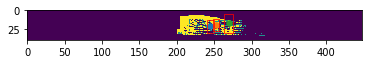

In [17]:
# Create figure and axes
plt.clf()
fig,ax = plt.subplots(1)

# Display the image
img = np.clip(np.mean(lidar_image.transpose()[:, :, :], 2), 0, 1)
# img = cv2.resize(img, (112, 128))
ax.imshow(img)

for i in range(0, len(labels)):
    w = labels[i][3]
    h = labels[i][4] 
    d = labels[i][5]
    x = labels[i][0]
    y = labels[i][1]
    z = labels[i][2]
    print(w, h, d)
    plt.scatter(y, z, s=30)
    a = labels[i][6]
    if a < 0:
      a = a + 3.14
    
    rect = patches.Rectangle((y-h/2, z-d/2),h, d, angle= 0,linewidth=0.75,edgecolor='r',facecolor='none')

    ax.add_patch(rect)
    
plt.show()


35.650322073587674 9.742349302129796 17.54806340468203
29.43907896446317 8.81829472937727 15.695767823076704
37.068005077664715 11.654118861282948 25.24971345451469


<Figure size 432x288 with 0 Axes>

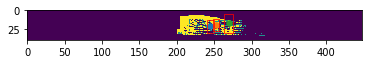

In [18]:
# Create figure and axes
plt.clf()
fig,ax = plt.subplots(1)

# Display the image
img = np.clip(np.mean(lidar_image.transpose()[:, :, :], 2), 0, 1)
# img = cv2.resize(img, (112, 128))
ax.imshow(img)

for i in range(0, len(labels)):
    w = labels[i][3]
    h = labels[i][4] 
    d = labels[i][5]
    x = labels[i][0]
    y = labels[i][1]
    z = labels[i][2]
    print(w, h, d)
    plt.scatter(y, z, s=30)
    a = labels[i][6]
    if a < 0:
      a = a + 3.14
    
    rect = patches.Rectangle((y-h/2, z-d/2),h, d, angle= 0,linewidth=0.75,edgecolor='r',facecolor='none')

    ax.add_patch(rect)
    
plt.show()


<Figure size 432x288 with 0 Axes>

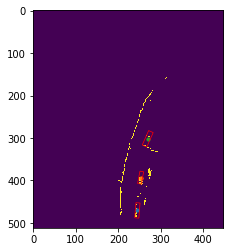

In [23]:


plt.clf()
fig,ax = plt.subplots(1)



img = np.clip(np.mean(lidar_image[:, :, 20:], 2), 0, 1)
ax.imshow(img)


for j in range(0, len(labels)):

    w = labels[j][3]
    h = labels[j][4] 
    x = labels[j][0] 
    y = labels[j][1] 
#     x, y = rotate2((512//2, 448//2), (x, y), math.radians(ang))
    a = labels[j][6]
    if a < 0:
          a = a + 3.14
#     print(y, x)
    plt.scatter(y, x, s=10)

    polygon = convert5Pointto8Point(y, x, w, h, -a*57.2958)
    xs = polygon[0::2]
    ys = polygon[1::2]
    l = []
    for i in range(4):
        l.append([xs[i], ys[i]])
            
    rect = patches.Polygon(l,linewidth=0.75,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

plt.show()

NameError: name 'lidar_image' is not defined

<Figure size 432x288 with 0 Axes>

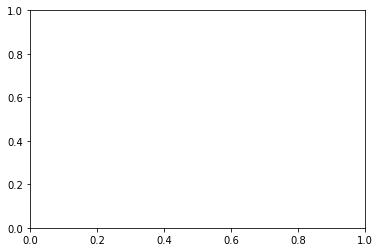

In [32]:


plt.clf()
fig,ax = plt.subplots(1)



img = np.clip(np.mean(lidar_image[:, :, :], 2), 0, 1)
ax.imshow(img)

boxes = []

for j in range(0, len(labels)):

    w = labels[j][3]
    h = labels[j][4] 
    x = labels[j][0] 
    y = labels[j][1] 
#     x, y = rotate2((512//2, 448//2), (x, y), math.radians(ang))
    a = labels[j][6]
    if a < 0:
          a = a + 3.14
#     print(y, x)
    plt.scatter(y, x, s=10)
    a -= ang/57.2958

    polygon = convert5Pointto8Point(y, x, w, h, -a*57.2958)
    xs = polygon[0::2]
    ys = polygon[1::2]
    l = []
    for i in range(4):
        l.append([xs[i], ys[i]])
        
    boxes.append([xs[0], ys[0], xs[2], ys[2]])
    
    rect = patches.Polygon(l,linewidth=0.75,edgecolor='r',facecolor='none')
#     ax.add_patch(rect)

plt.show()

<Figure size 432x288 with 0 Axes>

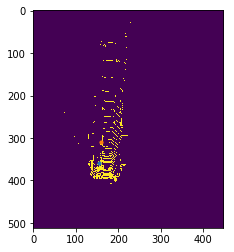

In [459]:


plt.clf()
fig,ax = plt.subplots(1)



img = np.clip(np.mean(lidar_image[:, :, :], 2), 0, 1)
ax.imshow(img)

boxes = []

for j in range(0, len(labels)):

    w = labels[j][5]
    h = labels[j][4] 
    x = labels[j][0] 
    y = labels[j][1] 
#     x, y = rotate2((512//2, 448//2), (x, y), math.radians(ang))
    a = labels[j][6]
    if a < 0:
          a = a + 3.14
#     print(y, x)
    plt.scatter(y, x, s=10)
    a -= ang/57.2958

    polygon = convert5Pointto8Point(y, x, w, h, -a*57.2958)
    xs = polygon[0::2]
    ys = polygon[1::2]
    l = []
    for i in range(4):
        l.append([xs[i], ys[i]])
        
    boxes.append([xs[0], ys[0], xs[2], ys[2]])
    
    rect = patches.Polygon(l,linewidth=0.75,edgecolor='r',facecolor='none')
#     ax.add_patch(rect)

plt.show()

<Figure size 432x288 with 0 Axes>

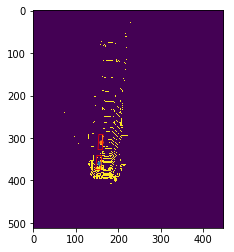

In [460]:


plt.clf()
fig,ax = plt.subplots(1)



img = np.clip(np.mean(lidar_image[:, :, 0:], 2), 0, 1)
ax.imshow(img)

boxes = []

for j in range(0, len(labels)):

    w = labels[j][5]
    h = labels[j][4] 
    x = labels[j][0] 
    y = labels[j][1] 
#     x, y = rotate2((512//2, 448//2), (x, y), math.radians(ang))
    a = labels[j][6]
    if a < 0:
          a = a + 3.14
#     print(y, x)
    plt.scatter(y, x, s=10)
    a -= ang/57.2958

    polygon = convert5Pointto8Point(y, x, w, h, -a*57.2958)
    xs = polygon[0::2]
    ys = polygon[1::2]
    l = []
    for i in range(4):
        l.append([xs[i], ys[i]])
        
    boxes.append([xs[0], ys[0], xs[2], ys[2]])
    
    rect = patches.Polygon(l,linewidth=0.75,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

plt.show()

<Figure size 432x288 with 0 Axes>

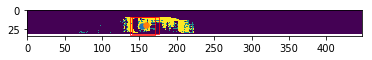

In [461]:
# Create figure and axes
plt.clf()
fig,ax = plt.subplots(1)

# Display the image
img = np.clip(np.mean(lidar_image.transpose()[:, :, :], 2), 0, 1)
# img = cv2.resize(img, (112, 128))
ax.imshow(img)

for i in range(0, len(labels)):
    w = labels[i][5]
    h = labels[i][4] 
    d = labels[i][3]
    x = labels[i][0]
    y = labels[i][1]
    z = labels[i][2]

    plt.scatter(y, z, s=30)
    a = labels[i][6]
    if a < 0:
      a = a + 3.14
    
    rect = patches.Rectangle((y-w/2, z-d/2),w, d, angle= 0,linewidth=0.75,edgecolor='r',facecolor='none')

    ax.add_patch(rect)
    
plt.show()


<Figure size 432x288 with 0 Axes>

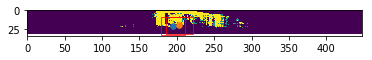

In [97]:
# Create figure and axes
plt.clf()
fig,ax = plt.subplots(1)

# Display the image
img = np.clip(np.mean(lidar_image.transpose()[:, :, :], 2), 0, 1)
# img = cv2.resize(img, (112, 128))
ax.imshow(img)

for i in range(0, len(labels)):
    w = labels[i][5]
    h = labels[i][4] 
    d = labels[i][3]
    x = labels[i][0]
    y = labels[i][1]
    z = labels[i][2]

    plt.scatter(y, z, s=30)
    a = labels[i][6]
    if a < 0:
      a = a + 3.14
    
    rect = patches.Rectangle((y-w/2, z-d/2),w, d, angle= 0,linewidth=0.75,edgecolor='r',facecolor='none')

    ax.add_patch(rect)
    
plt.show()


213.44088198142998 470.9414182099751
215.5361926411182 453.4303603952318
218.70762826240806 433.1098955856667
220.88287605061427 399.9302864991778
224.26523532236203 343.22332711568487
228.92593997014578 323.2569762432431
242.78525666464398 238.99070749476869


<Figure size 432x288 with 0 Axes>

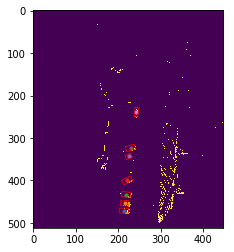

In [31]:


plt.clf()
fig,ax = plt.subplots(1)


img = np.clip(np.mean(lidar_image[:, :, 13:], 2), 0, 1)
ax.imshow(img)

boxes = []

for j in range(0, len(labels)):

    w = labels[j][5]
    h = labels[j][4] 
    x = labels[j][0] 
    y = labels[j][1] 
    a = labels[j][6]
    if a < 0:
          a = a + 3.14
    print(y, x)
    plt.scatter(y, x, s=10)

    polygon = convert5Pointto8Point(y, x, w, h, -a*57.2958)
    xs = polygon[0::2]
    ys = polygon[1::2]
    l = []
    for i in range(4):
        l.append([xs[i], ys[i]])
        
    boxes.append([xs[0], ys[0], xs[2], ys[2]])
    
    rect = patches.Polygon(l,linewidth=0.75,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

plt.show()

<Figure size 432x288 with 0 Axes>

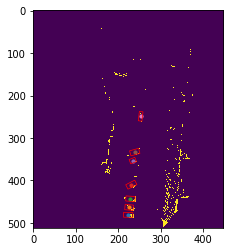

In [32]:


plt.clf()
fig,ax = plt.subplots(1)

lidar_image_copy = lidar_image.copy()
lidar_image_copy[:10, :10, :] = 0.
lidar_image_copy[10:, 10:, :] = lidar_image[:-10, :-10, :]

img = np.clip(np.mean(lidar_image_copy[:, :, 13:], 2), 0, 1)
ax.imshow(img)

boxes = []

for j in range(0, len(labels)):

    w = labels[j][5]
    h = labels[j][4] 
    x = labels[j][0] + 10
    y = labels[j][1] + 10
    a = labels[j][6]
    if a < 0:
          a = a + 3.14
    
    plt.scatter(y, x, s=10)

    polygon = convert5Pointto8Point(y, x, w, h, -a*57.2958)
    xs = polygon[0::2]
    ys = polygon[1::2]
    l = []
    for i in range(4):
        l.append([xs[i], ys[i]])
        
    boxes.append([xs[0], ys[0], xs[2], ys[2]])
    
    rect = patches.Polygon(l,linewidth=0.75,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

plt.show()

<Figure size 432x288 with 0 Axes>

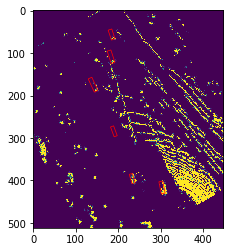

In [109]:


plt.clf()
fig,ax = plt.subplots(1)

ang = 30
lidar_image_copy = lidar_image.copy()
lidar_image_copy = ndimage.rotate(lidar_image_copy, ang, reshape=False)

img = np.clip(np.mean(lidar_image_copy[:, :, 13:], 2), 0, 1)
ax.imshow(img)

boxes = []

for j in range(0, len(labels)):
    
    w = labels[j][5]
    h = labels[j][4] 
    x = labels[j][0] 
    y = labels[j][1]
    x, y = rotate((512//2, 448//2), (x, y), math.radians(ang))
    a = labels[j][6]
    if a < 0:
          a = a + 3.14
    
    plt.scatter(y, x, s=10)

    polygon = convert5Pointto8Point(y, x, w, h, -a*57.2958 + ang)
    xs = polygon[0::2]
    ys = polygon[1::2]
    l = []
    for i in range(4):
        l.append([xs[i], ys[i]])
        
    boxes.append([xs[0], ys[0], xs[2], ys[2]])
    
    rect = patches.Polygon(l,linewidth=0.75,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

plt.show()